In [1]:
import pandas as pd
from top2vec import Top2Vec


In [33]:
paper = pd.read_csv("data\papers.csv")
model = Top2Vec(
    documents=paper.abstract.dropna().to_list(),
    speed="deep-learn",
    workers=10,
    umap_args={
        "min_dist": 0,
        "densmap": True,
        "unique": True
    })


2021-12-20 13:36:26,926 - top2vec - INFO - Pre-processing documents for training
2021-12-20 13:36:29,244 - top2vec - INFO - Creating joint document/word embedding
2021-12-20 13:41:20,890 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-20 13:41:34,217 - top2vec - INFO - Finding dense areas of documents
2021-12-20 13:41:34,344 - top2vec - INFO - Finding topics


In [34]:
topic_words, word_scores, topic_nums = model.get_topics()


In [42]:
topic_words[:, :4]


array([['armed', 'bandit', 'reinforcement', 'undirected'],
       ['answering', 'question', 'answer', 'visual'],
       ['privacy', 'private', 'devices', 'price'],
       ['imitation', 'sensory', 'humans', 'environment'],
       ['plasticity', 'synaptic', 'spiking', 'neurons'],
       ['lifted', 'logic', 'inference', 'relational']], dtype='<U14')

In [143]:
import umap.plot
umap_args_model = {
    "n_neighbors": 50,
    "n_components": 2,
    "densmap": True,
    "metric": "cosine",
    "unique": True,
    # 'min_dist': 0,
    # 'spread': 1
}
umap_model = umap.UMAP(**umap_args_model).fit(
    X=model._get_document_vectors(norm=False)
    )


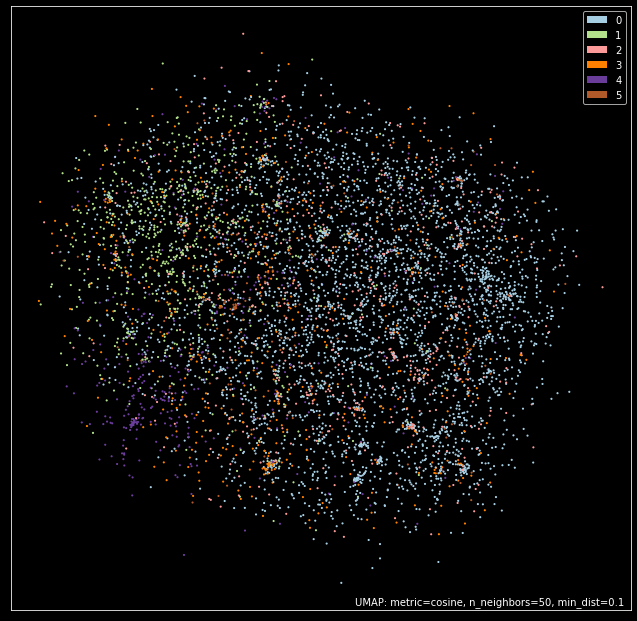

In [144]:
umap_fig2 = umap.plot.points(
    umap_model, labels=model.doc_top, color_key_cmap='Paired', background="black")


In [145]:
documents, document_scores, document_ids = model.search_documents_by_topic(
    topic_num=3, num_docs=5)
